In [1]:
from PIL import Image
import os 
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import cv2
from skimage.morphology import skeletonize



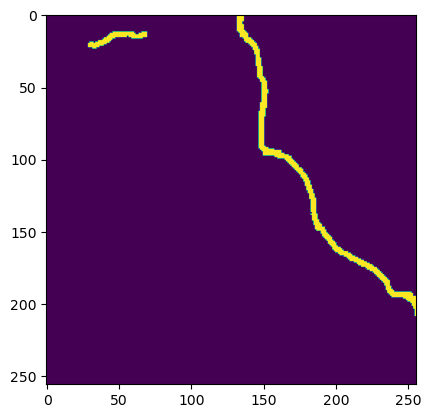

In [2]:
mask_dir = Path("/home/shabbir/repos/glowing-garbanzo/data_from_tasneem/masks")
mask_path = mask_dir / "crack-o-90.png"
mask = Image.open(mask_path)
mask = np.asarray(mask)
plt.imshow(mask)

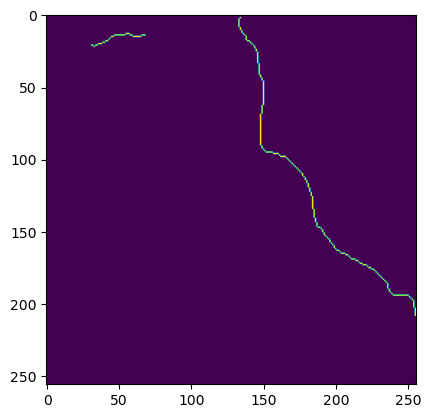

In [3]:

skeleton = skeletonize(mask,method='lee')
plt.imshow(skeleton)

3.5969

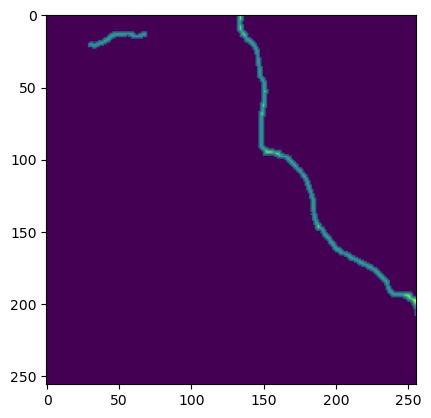

In [4]:
distance = cv2.distanceTransform(mask, distanceType=cv2.DIST_L2, maskSize=5).astype(np.float32)
plt.imshow(distance)

np.max(distance)

In [5]:
np.histogram(skeleton)

(array([65257,     0,     0,     0,     0,     0,     0,     0,     0,
          279]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]))

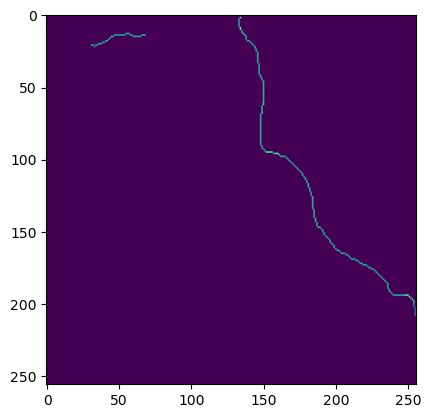

In [6]:
thickness = distance * (skeleton!=0)
plt.imshow(thickness)

In [7]:
# get average thickness for non-zero pixels
average = np.mean(thickness[thickness!=0])

# thickness = 2*average
thick = 2 * average
print("thickness:", thick)

thickness: 4.224478721618652


In [8]:
from skan import Skeleton, summarize
branch_data = summarize(Skeleton(skeleton))
branch_data.head()

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,0,0,278,278.521861,0,1.0,0.0,2,134,208,255,2,134,208,255,238.907932
1,1,27,53,42.384776,0,1.0,0.0,14,68,21,31,14,68,21,31,37.656341


<Axes: >

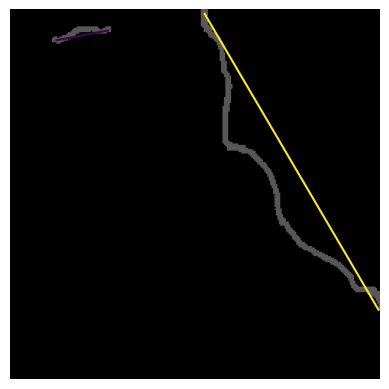

In [9]:
from skan import draw
draw.overlay_euclidean_skeleton_2d(mask, branch_data,
                                   skeleton_color_source='branch-distance')
